# Dependencies

In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [89]:
from scipy.io import loadmat
from MP import progress_bar
from glob import glob
import pandas as pd
import time,os
from matplotlib import gridspec
gs=gridspec.GridSpec
uet=progress_bar.update_elapsed_time

from MP.lib import mpl_lib
from MP.lib.mpl_lib import rm_all_lab as ral
from MP.lib.mpl_lib import tune_xy_lim as txl
from matplotlib.colors import LogNorm

from MP.mat import mech

- Current work direction 

In [90]:
pwd

u'/Users/yj/repo/forming_limit_dic/tutorials'

- Available files

In [144]:
path='URD'

print os.popen('ls /Users/yj/GoogleDrive/expdat/FLD/%s/'%path).read()

IF_URD_-0003_0.mat
IF_URD_-0040_0.mat
IF_URD_-0100_0.mat
IF_URD_-0162_0.mat
IF_URD_-0200_0.mat
IF_URD_-0250_0.mat
IF_URD_-0269_0.mat
IF_URD_-0300_0.mat
IF_URD_-0315_0.mat
IF_URD_-0322_0.mat
IF_URD_-0326_0.mat
IF_URD_-0328_0.mat
IF_URD_-0330_0.mat
IF_URD_-0331_0.mat
IF_URD_-0332_0.mat
IF_URD_-0333_0.mat
IF_URD_-0334_0.mat
IF_URD_-0335_0.mat



- Pick a file name ( each file corresponds to single snapshot)

In [145]:
fn_start='/Users/yj/GoogleDrive/expdat/FLD/%s/*0???_0.mat'%path
fns=glob(fn_start)
for fn in fns:
    print fn
    if not(os.path.isfile(fn)):
        raise IOError, '%s is not loadable'%fn

/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0003_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0040_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0100_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0162_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0200_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0250_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0269_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0300_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0315_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0322_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0326_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0328_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0330_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0331_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0332_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0333_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0334_0.mat
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-033

- Load the file and measure the file loading time

In [146]:
t0=time.time()
dat_raw=[]
dic_ind=[]
for fn in fns:
    dum=os.path.split(fn)[-1].split('.mat')[0][::-1]
    dum = dum[:6][::-1]
    ind=int(dum[:4:])
    print fn,ind
    dic_ind.append(ind)
    dat_dict=loadmat(fn)
    dat_raw.append(dat_dict)
print
uet(time.time()-t0,head='loading time:')

/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0003_0.mat 3
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0040_0.mat 40
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0100_0.mat 100
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0162_0.mat 162
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0200_0.mat 200
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0250_0.mat 250
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0269_0.mat 269
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0300_0.mat 300
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0315_0.mat 315
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0322_0.mat 322
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0326_0.mat 326
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0328_0.mat 328
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0330_0.mat 330
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0331_0.mat 331
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0332_0.mat 332
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD_-0333_0.mat 333
/Users/yj/GoogleDrive/expdat/FLD/URD/IF_URD

In [147]:
print dic_ind

[3, 40, 100, 162, 200, 250, 269, 300, 315, 322, 326, 328, 330, 331, 332, 333, 334, 335]


- Variables available in each file

In [148]:
print dat_raw[0].keys()

['q_ref', 'dV_dt', 'X', 'SIGMA_Z', 'SIGMA_Y', 'SIGMA_X', 'dExx_dt', 'dEyy_dt', 'eyy', 'r_ref', 'e_vonmises', 'e3_dot', 'U', 'W', 'V', 'Y', 'dU_dt', 'Z', 'e1', 'e3', 'e2', 'dExy_dt', 'q', 'r', 'u', 'exx', 'v', 'y', 'x', 'dW_dt', 'sigma', 'gamma', 'exy']


In [149]:
nstp = len(dat_raw)
nx,ny = dat_raw[-1]['sigma'].shape
print 'Total number of steps (# of DIC snapshots):', nstp
print '2D resolution (nx,ny):', nx,ny,'nx*ny:',nx*ny

Total number of steps (# of DIC snapshots): 18
2D resolution (nx,ny): 206 141 nx*ny: 29046


# Comparison between unfiltered raw data and data filtered by $\sigma$ 

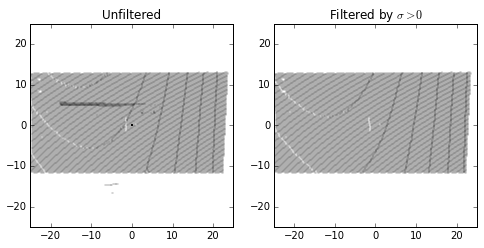

In [150]:
fig=plt.figure(121,figsize=(8,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.scatter(dat_raw[-1]['X'],dat_raw[-1]['Y'],marker='.',s=0.05)
ax1.set_xlim(-25,25);ax1.set_ylim(-25,25)
ax1.set_aspect('equal');ax1.set_title('Unfiltered')

ax2.scatter(dat_raw[-1]['X'][dat_raw[-1]['sigma']>0],dat_raw[-1]['Y'][dat_raw[-1]['sigma']>0],marker='.',s=0.05)
ax2.set_xlim(-25,25);ax2.set_ylim(-25,25)
ax2.set_aspect('equal');ax2.set_title(r'Filtered by $\sigma>0$')

# Define necessary functions

In [151]:
"""
Find minimum or maximum discarding +- inp and nan
"""
def find_mx(a):
    mx=None
    for i in xrange(len(a)):
        if ((a[i]>mx and a[i]!=np.inf) or mx==None) and not(np.isnan(a[i])): 
            mx=a[i]
    return mx

def find_mxi(a):
    mx=None; ind=None
    for i in xrange(len(a)):
        if ((a[i]>mx and a[i]!=np.inf) or mx==None) and not(np.isnan(a[i])): 
            mx=a[i]
            ind=i
    return mx,ind

def find_mn(a):
    mn=None
    for i in xrange(len(a)):
        if ((a[i]<mn and a[i]!=-np.inf) or mn==None) and not(np.isnan(a[i])): mn=a[i]
    return mn

def find_mni(a):
    mn=None; ind=None
    for i in xrange(len(a)):
        if ((a[i]<mn and a[i]!=np.inf) or mn==None) and not(np.isnan(a[i])): 
            mn=a[i]
            ind=i
    return mn,ind

def find_mxmn(*args):
    """
    Return max and min
    """
    maxs, mns=[], []
    for a in args:
        mns.append(find_mn(a))
        mxs.append(find_mx(a))
    return mxs, mns

## Contruct a normalized spectrum of color
def make_cb(dat,mn=None,mx=None,log=False):
    """
    Arguments
    =========
    dat
    mn  = None
    mx  = None
    log = False (If True, use LogNorm)
    """
    array = dat.flatten()
    if mn==None: mn = find_mn(array) 
    if mx==None: mx = find_mx(array)
    if log: norm=LogNorm(vmin=mn,vmax=mx)
    else:   norm=mpl.colors.Normalize(vmin=mn,vmax=mx)
    cmap,m = mpl_lib.norm_cmap(mn=mn,mx=mx,cm_name='jet')
    return cmap, norm, m

- Data masking bases on $\sigma$ values - those elements with $\sigma>0.$

plotting time:: 00 [sec]

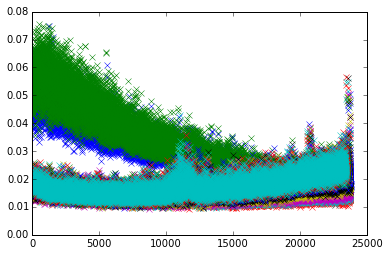

In [152]:
#np.maskdat_raw[0]['q_ref']
t0=time.time()
for istp in xrange(nstp):
    dum=dat_raw[istp]['sigma'][dat_raw[istp]['sigma']>0]
    plot(dum.flatten(),'x')
    uet(time.time()-t0,head='plotting time:')
uet(time.time()-t0,head='plotting time:')

- Test dat_mask can easily mask unwanted data based on its 'key' from the dictionary raw data "dat_raw" array.

key:"exx" 
-----------


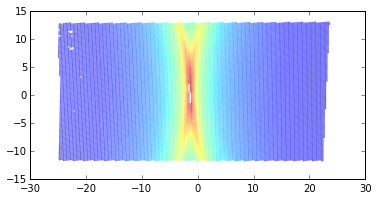

In [153]:
## Data masking
def dat_mask(dat_raw,istp,*keys):
    """
    From dat_raw, mask the data
    that have its corresponding 'sigma' value 
    lower than zero.
    
    Also, return masked data for the given step.
    """
    d=[]
    k=0
    for key in keys:
        # if k==0:print np.array(dat_raw[istp][key]).shape
        if key=='evm':
            array = calc_EVM(dat_raw[istp])
        elif key=='dEzz_dt':
            array = calc_dEzz_dt(dat_raw[istp])
        elif key=='ezz':
            array = calc_ezz(dat_raw[istp])
        else:
            array = dat_raw[istp][key]
        sigma = dat_raw[istp]['sigma']
        array = array[sigma>0]
        d.append(array)        
        k=k+1
    return d


def calc_EVM(dat_raw):
    """
    Calculate EVM
    """
    e1 = dat_raw['e1']
    e2 = dat_raw['e2']
    e3 = -e1-e2 #0.
    
    evm = 2./3. * (e1**2+e2**2+e3**2)
    evm = np.sqrt(evm)
    return evm

def calc_ezz(dat_raw):
    exx = dat_raw['exx']
    eyy = dat_raw['eyy']
    return -exx-eyy

def calc_dEzz_dt(dat_raw):
    dExx_dt = dat_raw['dExx_dt']
    dEyy_dt = dat_raw['dEyy_dt']
    return -dExx_dt - dEyy_dt



## --
key='exx'
#key='dExx_dt'
#key='e3'
print 'key:"%s"'%key,'\n-----------'
for istp in xrange(nstp):
    x, y, z = dat_mask(dat_raw,istp,'X','Y',key)
    mx, mn  = find_mx(z), find_mn(z)
    #if istp==0: print '%5s %5s'%('min','max')
    #print '%5.3f %5.3f'%(mn, mx)

cmap, norm, m = make_cb(z,mn=mn,mx=mx)
C=m.to_rgba(z)
scatter(x,y,color=C,marker='.',s=0.3)
plt.gca().set_aspect('equal')

# PLOT XY(Z)

nx 23419


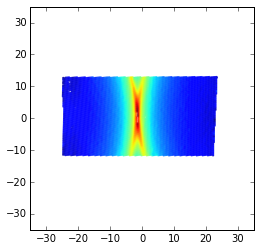

In [154]:
istp=-1
keys = 'evm'
X,Y,Z = dat_mask(dat_raw, istp, 'X','Y',key)  ## premasked array by 'sigma'
mn,mx=find_mn(Z),find_mx(Z)
cmap,norm,m = make_cb(dat=Z,mn=mn,mx=mx)

nx,= X.shape
print 'nx',nx
cs=[];X_=[];Y_=[];

c = m.to_rgba(Z)
plt.scatter(X,Y,marker='.',color=c,s=0.5)#,s=0.05)
plt.gca().set_xlim(-35,35); plt.gca().set_ylim(-35,35)
plt.gca().set_aspect('equal')

## -- As a first approximation, get an average with an small area

- Reduce data set by area

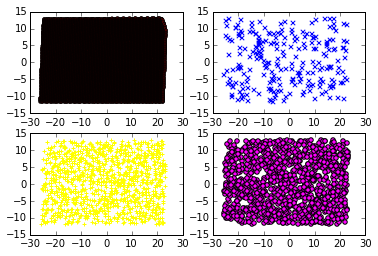

In [155]:
def r_area(x,y,rad,x0,y0,*args):
    """
    Reduce the data by its radius
    """
    x,y = x-x0,y-y0
    r = np.sqrt(x**2+y**2)
    zs=[]
    for arg in args:
        zs.append(arg[r<rad])
    return zs

def rr(x,y,rad,x0,y0,p,*args):
    #print len(x) ,' ->',
    zs=r_area(x,y,rad,x0,y0,*args)
    #print len(zs[0]), '->',
    
    if p<0: return zs
    elif p>0 and p<1: 
        #print len(zs[0])
        n = int(len(zs[0])*p)
        #print n
    elif p==1:
        return zs

    slc = random.choice(len(zs[0]),n)
    Z=[]
    for i in range(len(zs)):
        Z.append(zs[i][slc])
    return Z

def stat(dat):
    return np.average(dat), np.std(dat)


## application
key = 'e_vonmises'
x_,y_,z_=dat_mask(dat_raw,0,'X','Y',key)

## masking by 'area' and extract from only a portion of total data
fig=plt.figure()
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
x,y,z = rr(x_,y_,30,-5,0,1,x_,y_,z_)
ax1.scatter(x,y,marker='.',c='red')
x,y,z = rr(x_,y_,30,-5,0,0.01,x_,y_,z_)
ax2.scatter(x,y,marker='x',c='blue')
x,y,z = rr(x_,y_,30,-5,0,0.05,x_,y_,z_)
ax3.scatter(x,y,marker='+',c='yellow')
x,y,z = rr(x_,y_,40,-5,0,0.05,x_,y_,z_)
ax4.scatter(x,y,marker='o',c='magenta')



5 4
Elapsed time:: 00 [sec]minimum and maximum -0.0520634 0.0394176
Elapsed time:: 03 [sec]

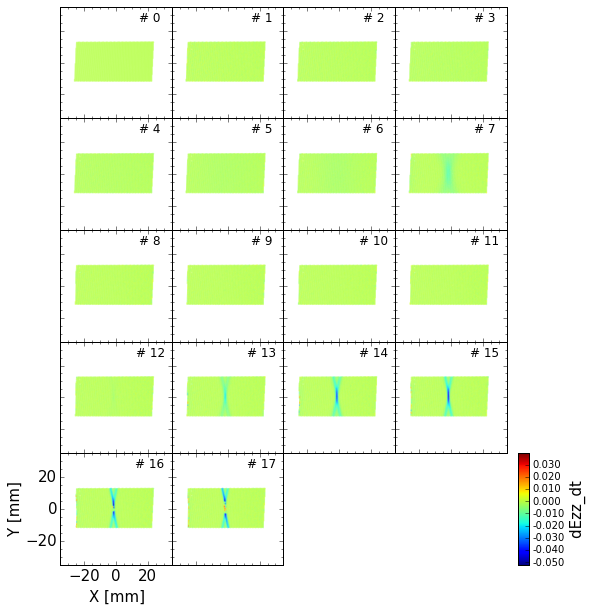

In [156]:
"""
Keys in the dictionary file:
----------------------------
'q_ref', 'dV_dt', 'X', 'dExx_dt', 'dEyy_dt', 'eyy', 'r_ref', 'e_vonmises', 'e3_dot', 'U', 'W', 'V', 'Y', 'dU_dt',
'Z', 'e1', 'e3', 'e2', 'dExy_dt', 'q', 'r', 'u', 'exx', 'v', 'y', 'x', 'dW_dt', 'sigma', 'gamma', 'exy'
"""
t0=time.time()
key = 'dEzz_dt'

nc=int(sqrt(nstp))+1
nr=nstp/nc; nr = nr + 1
print nc,nr

if nc*nr<nstp: raise IOError, 'Insufficient cells'
g=gs(nc*10,(nr+1)*10,hspace=0,wspace=0)

ux=2;uy=2
fig=plt.figure(figsize=((nr+1)*ux,nc*uy))

mns=[];mxs=[]
for istp in xrange(nstp):
    Z, = dat_mask(dat_raw,istp,key)
    mn, mx = find_mn(Z),find_mx(Z)
    mns.append(mn); mxs.append(mx)
    uet(time.time()-t0,head='Elapsed time:')
mn,mx = find_mn(mns), find_mx(mxs)
print 'minimum and maximum',mn, mx

norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)



k = 0; axes = []
for i in xrange(nc):
    for j in xrange(nr):
        ax=fig.add_subplot(g[i*10:(i+1)*10,j*10:(j+1)*10])
        ax.set_aspect('equal')
        ax.minorticks_on()
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=8)

        x,y,z=dat_mask(dat_raw,k,'X','Y',key)
        cs=m.to_rgba(z)
        ax.scatter(x,y,marker='.',color=cs,s=0.02)
        ax.set_xlim(-35,35);ax.set_ylim(-35,35)
        ax.locator_params(nbins=4)
        ax.text(x=0.8,y=0.9,s='# %i'%k,verticalalignment='center',
                horizontalalignment='center',
                fontsize=12,transform=ax.transAxes)
        k=k+1
        if i==nc-1 and j==0:
            ax.set_xlabel('X [mm]',dict(fontsize=15))
            ax.set_ylabel('Y [mm]',dict(fontsize=15))
        else: axes.append(ax)
        uet(time.time()-t0,head='Elapsed time:')
        if k>=nstp: break
    if k>=nstp: break

txl(fig.axes)        
ral(axes)

axcb=fig.add_subplot(g[(nc-1)*10:(nc)*10,(nr)*10+1:(nr)*10+2])
mpl_lib.add_cb(ax=axcb,cmap=cmap, filled=True,
               format='%5.3f',norm=norm,
               ylab=r'%s '%key)

uet(time.time()-t0,head='Elapsed time:')

In [157]:
path=os.path.split(fn_start)[0]
fn=os.path.join(path,'DIC_results.txt')
print fn
f=open(fn,'w')

x0=-5;y0=0;rad=10

keys=['e1','e2','exx','eyy','exy']
evm = []
for istp in xrange(nstp):
    if istp==0: 
        f.write('%4s '%'DIC')
        for key in keys:
            f.write('%5s_A %5s_E '%(key,key))
        f.write('\n')
    f.write('%4.4i '%dic_ind[istp])
    for key in keys:
        x, y, z= dat_mask(dat_raw,istp,'X','Y',key)
        #   rr(x,y,rad,x0,y0,p,*args):
        zr = rr(x,y,rad,x0,y0,-1,z)
        avg,std= stat(zr)
        f.write('%7.4f %7.4f '%(avg, std))
    f.write('\n')
f.close()
st=os.popen('cat %s'%fn).read()
print st

/Users/yj/GoogleDrive/expdat/FLD/URD/DIC_results.txt
 DIC    e1_A    e1_E    e2_A    e2_E   exx_A   exx_E   eyy_A   eyy_E   exy_A   exy_E 
0003  0.0020  0.0014 -0.0011  0.0009  0.0015  0.0015 -0.0007  0.0009  0.0001  0.0010 
0040  0.0035  0.0014 -0.0020  0.0010  0.0033  0.0015 -0.0018  0.0009  0.0001  0.0010 
0100  0.0267  0.0020 -0.0166  0.0015  0.0266  0.0020 -0.0165  0.0015  0.0002  0.0015 
0162  0.0851  0.0026 -0.0544  0.0021  0.0851  0.0026 -0.0544  0.0021  0.0004  0.0020 
0200  0.1473  0.0029 -0.0945  0.0026  0.1473  0.0029 -0.0944  0.0026  0.0005  0.0023 
0250  0.2669  0.0051 -0.1692  0.0039  0.2669  0.0051 -0.1692  0.0039  0.0008  0.0028 
0269  0.3300  0.0136 -0.2073  0.0084  0.3300  0.0136 -0.2072  0.0084  0.0010  0.0031 
0300  0.4824  0.0971 -0.2928  0.0526  0.4824  0.0971 -0.2928  0.0526  0.0013  0.0038 
0315  0.5244  0.1477 -0.3129  0.0751  0.5243  0.1477 -0.3129  0.0751  0.0015  0.0041 
0322  0.5244  0.1478 -0.3130  0.0752  0.5243  0.1478 -0.3129  0.0752  0.0015  0.0041 
0

# Color map for individual DIC images

5 4
minimum and maximum -0.579834 0.0162255
Elapsed time:: 04 [sec]
/Users/yj/repo/forming_limit_dic/tutorials/test_local_DIC.png has been saved.


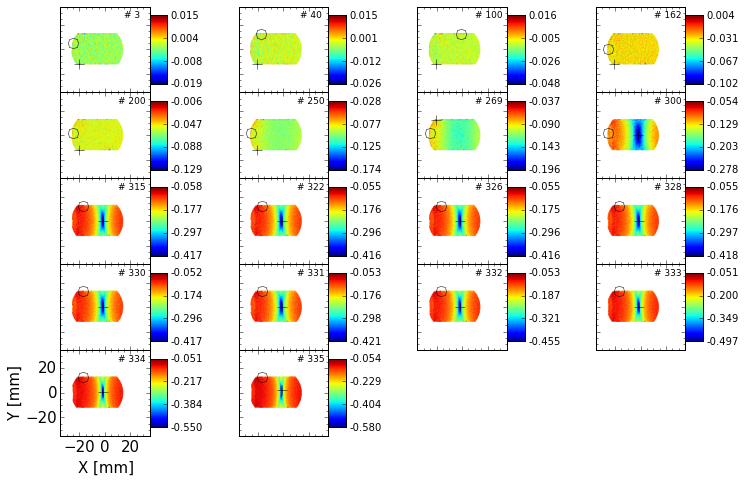

In [158]:
"""
Keys in the dictionary file:
----------------------------
'q_ref', 'dV_dt', 'X', 'dExx_dt', 'dEyy_dt', 'eyy', 'r_ref', 'e_vonmises', 'e3_dot', 'U', 'W', 'V', 'Y', 'dU_dt',
'Z', 'e1', 'e3', 'e2', 'dExy_dt', 'q', 'r', 'u', 'exx', 'v', 'y', 'x', 'dW_dt', 'sigma', 'gamma', 'exy'
"""
t0=time.time()
# key = 'e1'
# key = 'dEzz_dt'
key = 'ezz'
s=0.05

nc=int(sqrt(nstp))+1
nr=nstp/nc; nr = nr + 1
print nc,nr

if nc*nr<nstp: raise IOError, 'Insufficient cells'
g=gs(nc*13,(nr+1)*10,hspace=0,wspace=0)

ux=2;uy=2
fig=plt.figure(figsize=((nr+4)*ux,nc*uy))


## Use data within a certain range of distance (rad) from x0,y0
rad= 20.
x0 =-6.
y0 = 0.


mns=[];mxs=[];mxi=[];mni=[]
for istp in xrange(nstp):
    x,y,z = dat_mask(dat_raw,istp,'X','Y',key)
    x,y,z=rr(x,y,rad,x0,y0,1,x,y,z) # reduce the size
    mn= find_mn(z)
    mx,ix = find_mxi(z)
    mn,im = find_mni(z)
    mns.append(mn); mxs.append(mx);mxi.append(ix);mni.append(im)
mn,mx = find_mn(mns), find_mx(mxs)
print 'minimum and maximum',mn, mx


k = 0; axes = []
for i in xrange(nc):
    for j in xrange(nr):
        mn,mx = mns[k],mxs[k]
        norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
        cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)

        ax  =fig.add_subplot(g[i*10    :i*10+10,j*10  :j*10+5])
        axcb=fig.add_subplot(g[i*10+1  :i*10+9,j*10+5:j*10+6])
        #ax.set_aspect('equal')
        ax.minorticks_on()
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=8)

        ## confine data to be plotted
        x,y,z=dat_mask(dat_raw,k,'X','Y',key)
        x,y,z=rr(x,y,rad,x0,y0,1,x,y,z) # reduce the size
        
        x_mx, y_mx = x[mxi[k]],y[mxi[k]]
        x_mn, y_mn = x[mni[k]],y[mni[k]]
        
        cs=m.to_rgba(z)
        ax.scatter(x,y,marker='.',color=cs,s=s)
        ax.plot(x_mx,y_mx,'o',mfc='None',mec='k',ms=10)
        ax.plot(x_mn,y_mn,'x',mfc='None',mec='k',ms=10)
        ax.set_xlim(-35,35);ax.set_ylim(-35,35)
        ax.locator_params(nbins=4)
        ax.text(x=0.8,y=0.90,s='# %i'%dic_ind[k],verticalalignment='center',
                horizontalalignment='center',
                fontsize=9,transform=ax.transAxes)
        k=k+1
        if i==nc-1 and j==0:
            ax.set_xlabel('X [mm]',dict(fontsize=15))
            ax.set_ylabel('Y [mm]',dict(fontsize=15))
        else: axes.append(ax)

        cb=mpl_lib.add_cb(ax=axcb,cmap=cmap, filled=True,
               format='%5.3f',norm=norm,
               ylab='')
        cb.set_ticks(np.linspace(mn,mx,4))

        if k>=nstp: break
    if k>=nstp: break

# txl(fig.axes)
ral(axes)

uet(time.time()-t0,head='Elapsed time:')
print

fn_fig=os.path.join(os.getcwd(),'test_local_DIC.png')
gcf().savefig(fn_fig,bbox_inches='tight')
print fn_fig, 'has been saved.'

In [159]:
## Choose reference image.
print '%3s %3s %5s %5s'%('stp','DIC','MX','MN')
for istp in xrange(nstp):
    print '%3.3i %3.3i %5.5i %5.5i'%(istp,dic_ind[istp], mni[istp],mxi[istp])


stp DIC    MX    MN
000 003 01871 00060
001 040 01865 03016
002 100 01862 11293
003 162 01862 00036
004 200 01862 00043
005 250 01862 00043
006 269 01861 00043
007 300 10643 00043
008 315 10838 03432
009 322 10838 03432
010 326 10838 03432
011 328 10838 03432
012 330 10838 03432
013 331 10838 03432
014 332 10803 03397
015 333 10781 03375
016 334 10740 03334
017 335 10712 03312


In [161]:
istp_ref=007
dic_id = dic_ind[istp_ref]
mni, mxi= mni[istp_ref], mxi[istp_ref]

xyi = mni # or mxi 
print dic_id, xyi
## 



300 10643


In [162]:
def rho_transform(rho):                                                                                                         
    """                                                                                                                         
    Rho transformation (rho<=1 or rho>1)                                                                                        
    """                                                                                                                         
    if rho<=1.: return rho                                                                                                      
    if rho>1: return -1 *(rho -1.) + 1 

def draw_guide(ax,r_line = [-0.5,0. ,1,2,2.5],max_r=2,                                                                               
               ls='--',color='k',alpha=0.5):                                                                                   
    """                                                                                                                        
    Maximum should be a radius...                                                                                              
    """                                                                                                                        
    # guide lines for probed paths                                                                                             
    xlim=ax.get_xlim(); ylim=ax.get_ylim()                                                                                     
    for i in range(len(r_line)):                                                                                               
        r = r_line[i]                                                                                                          
        if r<=1:                                                                                                               
            mx=max_r                                                                                                           
            mx = mx/np.sqrt(1.+r**2)                                                                                           
            ys = np.linspace(0.,mx)                                                                                            
            xs = r * ys                                                                                                        
        elif r>1:                                                                                                              
            r = rho_transform(r)                                                                                           
            my = mx/np.sqrt(1.+r**2)                                                                                           
            xs = np.linspace(0.,my)                                                                                            
            ys = r * xs                                                                                                        
                                                                                                                               
        ax.plot(xs,ys,ls=ls,color=color,alpha=alpha)                                                                           
                                                                                                                               

    ax.set_xlim(xlim)                                                                                                          
    ax.set_ylim(ylim)                                                                                                          
                      

(-0.5, 0.5)

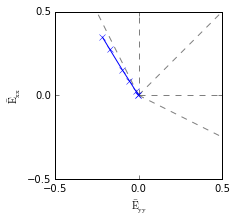

In [163]:
Ex=[]; Ey=[]
for istp in xrange(istp_ref):
    x,y = dat_mask(dat_raw,istp,'exx','eyy')
    x,y = rr(x,y,rad,x0,y0,1,x,y) # reduce the size
    Ex.append(x[xyi])
    Ey.append(y[xyi])
    
fig=plt.figure(figsize=(3,3))    
ax=fig.add_subplot(111)
draw_guide(ax)
ax.plot(Ey,Ex,'x-')
ax.locator_params(nbins=4)
ax.set_ylabel(r'$\mathrm{\bar{E}_{xx}}$')
ax.set_xlabel(r'$\mathrm{\bar{E}_{yy}}$')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

